<a href="https://colab.research.google.com/github/Rex60309/Generative_AI/blob/main/hw9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **測試截圖**

* prompt: 我想自學程式設計，但常常不知道該讀哪些教材，希望助理能規劃適合的路線圖給我。

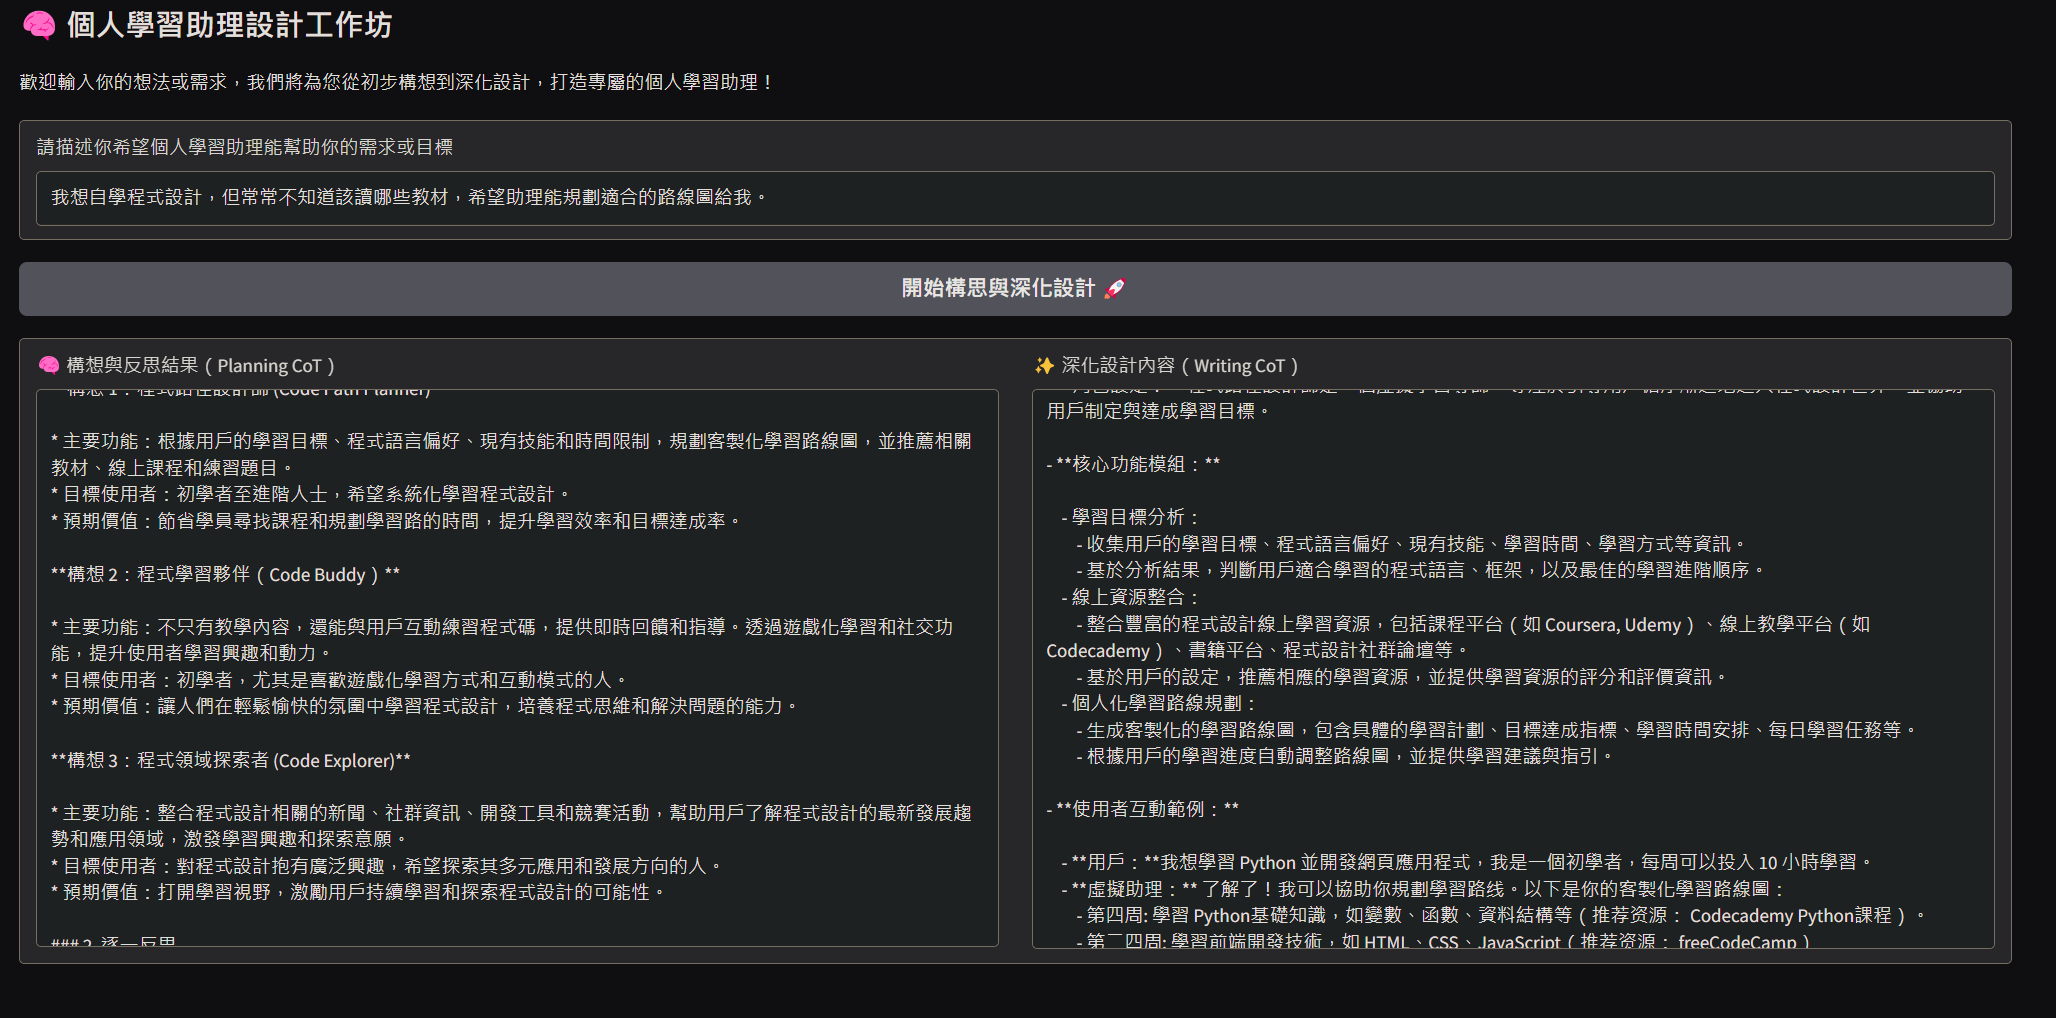

* prompt: 我正在準備研究所考試，需要一個學習助理幫我安排每日讀書計劃、追蹤進度，並且適時調整讀書內容。

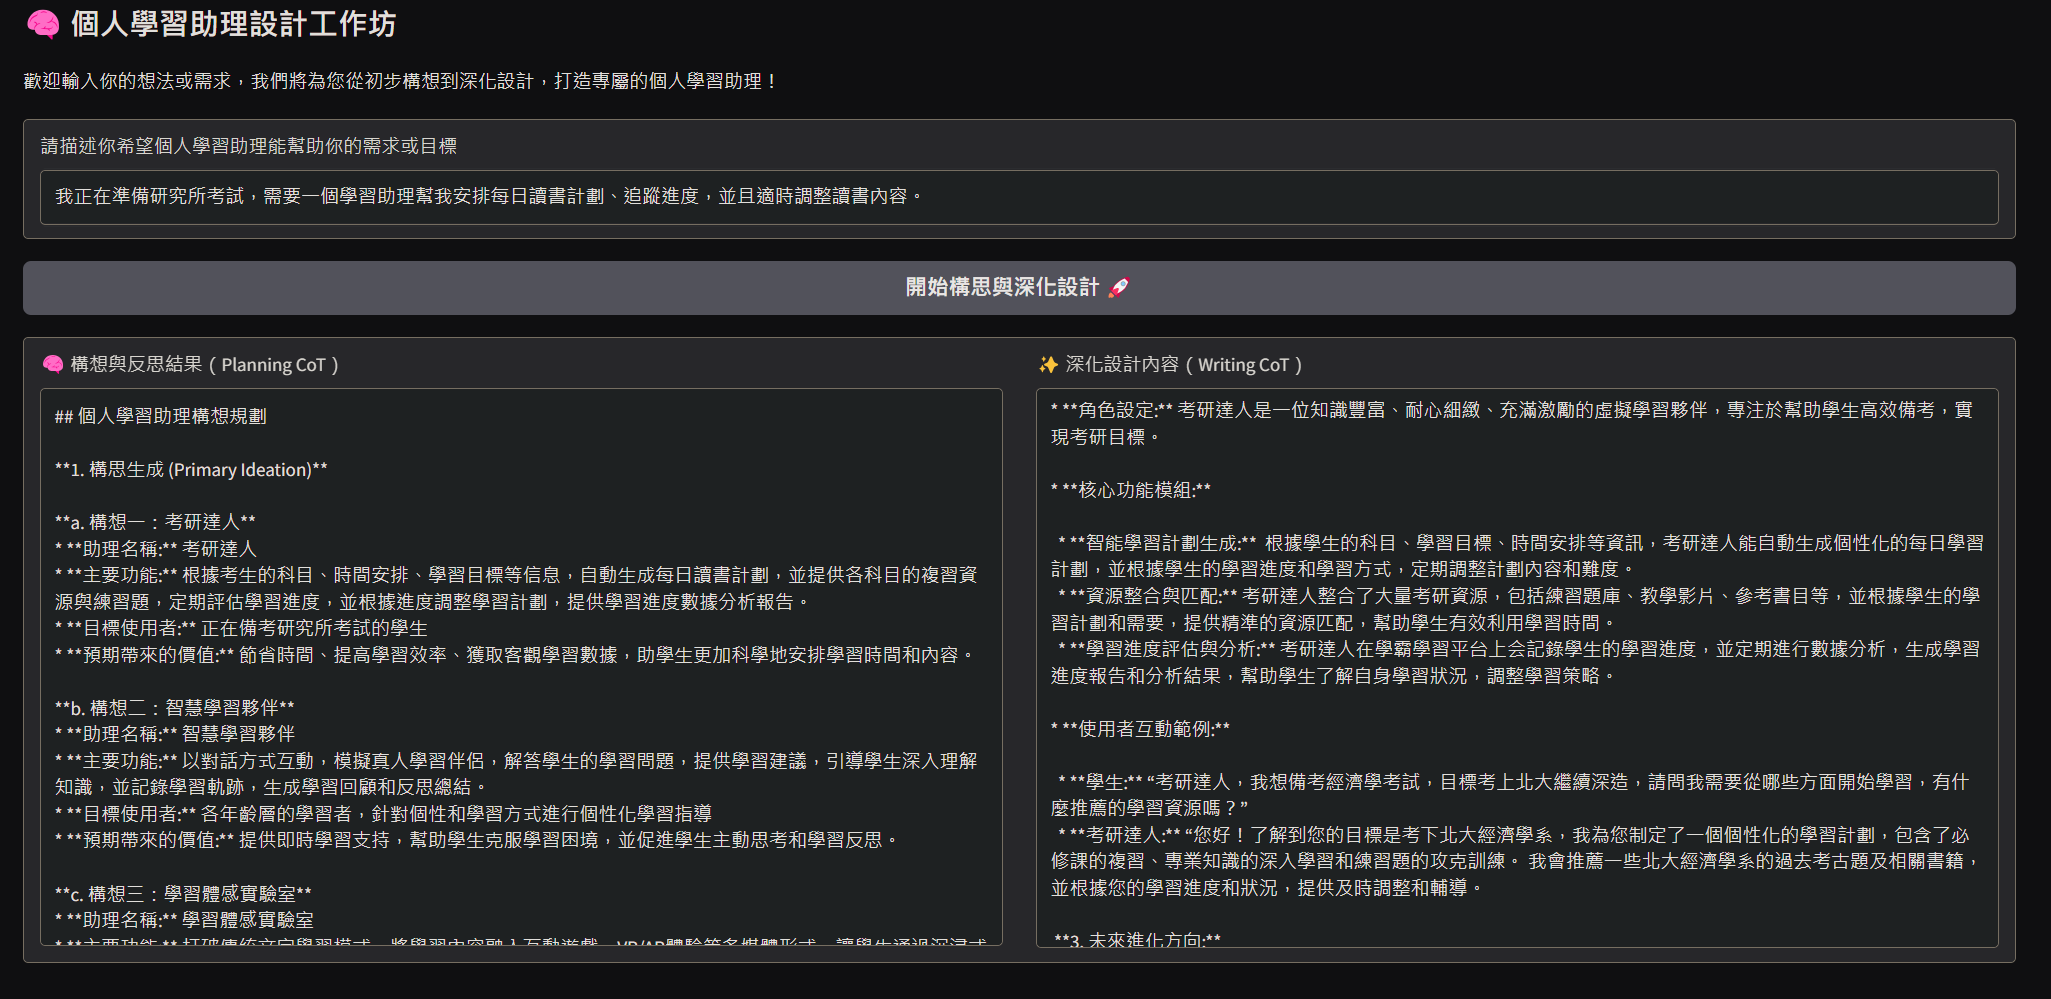

## **個人學習助理 - 思維鍊 (CoT) 生成**

#### 1. import 金鑰

In [26]:
import os
from google.colab import userdata

* 使用 `Groq` 金鑰

In [27]:
# Groq
api_key = userdata.get('Groq')
os.environ['GROQ_API_KEY']=api_key
provider = "groq"
model = "llama3-70b-8192"

In [28]:
!pip install aisuite[all]

### 2. 使用 AISuite

In [29]:
import aisuite as ai

* 使用 `Gemma2-9B-IT` model

In [30]:
provider_planner = "groq"
model_planner="Gemma2-9B-IT"

provider_writer = "groq"
model_writer = "Gemma2-9B-IT"

In [31]:
def reply(system="請用繁體中文回答。",
          prompt="Hi",
          provider="groq",
          model="Gemma2-9B-IT"
          ):

    client = ai.Client()

    messages = [
        {"role": "system", "content": system},
        {"role": "user", "content": prompt}
    ]


    response = client.chat.completions.create(model=f"{provider}:{model}", messages=messages)

    return response.choices[0].message.content

####  3. 打造二階段

* 設計system_planner: 先思考
* 設計system_writer: 根據先前思考，反思後調整

In [32]:
system_planner ="""
你是個「虛擬助理構想規劃者」，負責針對「個人學習助理」這個主題，生成初步想法，並進行反思與改進建議。請遵循以下步驟進行，並以繁體中文回答：

1. 構思生成 (Primary Ideation)

請列出 3 個不同角度的虛擬助理構想，每個包含：
 - 助理名稱
 - 主要功能
 - 目標使用者族群
 - 預期帶來的價值

2. 逐一反思 (Reflection Phase)

對每個構想進行分析，分為：
 - 優點（Strengths）
 - 潛在問題（Potential Issues）
 - 改進建議（Improvement Suggestions）

3. 結論與引導 (Guided Conclusion)

 - 根據反思，推薦一個最值得優先深化的構想，並說明理由。
"""

system_writer ="""
你是「虛擬助理設計深化者」，根據提供的初步構想及其改進建議，重新設計一個更完整的虛擬助理版本。請遵循以下步驟進行，並以繁體中文回答：

1. 理解初步構想

 - 簡要重述指派給你的初步構想與改進建議（100字內摘要）

2. 深入設計 (Deepening the Design)

 - 助理完整描述（角色設定）

 - 核心功能模組（至少三項，並說明用途）

 - 典型使用者互動範例（1~2個）

3. 潛在進化路徑 (Future Evolution)

 - 預想未來可增加的進階功能或擴展方向。
"""

In [33]:
def agent(prompt):
    # Step 1: 先構想並反思
    planning_prompt = f"""使用者需求：「{prompt}」
請根據這個需求，執行以下任務：
1. 提出三個不同方向的個人學習助理構想（包含：助理名稱、主要功能、目標使用者、預期價值）。
2. 分析每個構想的優點、潛在問題、並提出改進建議。
3. 根據反思結果，推薦一個最值得優先深化的構想，並說明理由。
請以繁體中文條列清楚回覆。"""

    planning_response = reply(
        system_planner,
        planning_prompt,
        provider=provider_planner,
        model=model_planner
    )

    # Step 2: 根據反思結果深化設計
    generation_prompt = f"""這是根據你的構思與反思得出的推薦構想：
{planning_response}

請依據推薦的構想，進行以下深化設計：
1. 簡要摘要這個構想及改進建議（100字內）。
2. 詳細描述虛擬助理的角色設定、三個核心功能模組（並說明用途）、一到兩個使用者互動範例。
3. 想像未來的進化路徑，列出可能新增的功能或擴展方向。
請以繁體中文、條列式且邏輯清晰的方式回覆。"""

    final_design = reply(
        system_writer,
        generation_prompt,
        provider=provider_writer,
        model=model_writer
    )

    return planning_response, final_design


### 4. 用 Gradio 打造 AI Agent Web App

In [34]:
!pip install gradio

In [35]:
import gradio as gr

In [36]:
with gr.Blocks() as demo:
    gr.Markdown("## 🧠 個人學習助理設計工作坊")
    gr.Markdown(
        "歡迎輸入你的想法或需求，我們將為您從初步構想到深化設計，打造專屬的個人學習助理！"
    )

    user_input = gr.Textbox(label="請描述你希望個人學習助理能幫助你的需求或目標")

    btn = gr.Button("開始構思與深化設計 🚀")

    with gr.Row():
        out1 = gr.Textbox(label="🧠 構想與反思結果（Planning CoT）", lines=15)
        out2 = gr.Textbox(label="✨ 深化設計內容（Writing CoT）", lines=20)

    btn.click(agent, inputs=[user_input], outputs=[out1, out2])


In [37]:
demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://a79e68100092503f59.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://a79e68100092503f59.gradio.live
